In [2]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [3]:
# import the dataset
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')


In [13]:
# m double checking the size
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (464809, 15)
y_train shape: (464809, 1)
X_test shape: (116203, 15)
y_test shape: (116203, 1)


In [4]:
# train the decision tree model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [5]:
y_pred = tree_clf.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1     0.9147    0.9143    0.9145     42557
           2     0.9240    0.9253    0.9246     56500
           3     0.8747    0.8610    0.8678      7121
           4     0.6786    0.6825    0.6806       526
           5     0.7655    0.7494    0.7573      1995
           6     0.7751    0.7885    0.7818      3489
           7     0.9308    0.9385    0.9346      4015

    accuracy                         0.9095    116203
   macro avg     0.8376    0.8371    0.8373    116203
weighted avg     0.9095    0.9095    0.9095    116203



In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9095290138808809


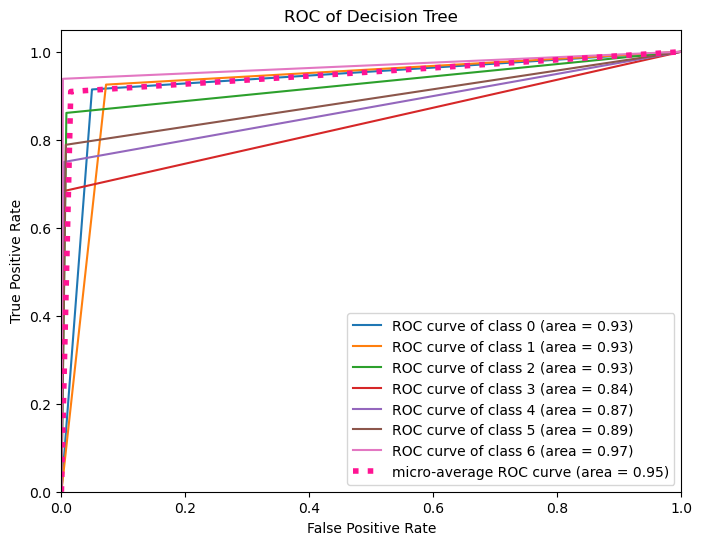

In [7]:
# Note: Use predict_proba to get the probabilities for the positive class
y_pred_proba = tree_clf.predict_proba(X_test)[:, 1]

# Binarize the output classes for the multiclass case
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calculate probabilities for each class
y_pred_proba = tree_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Decision Tree')
plt.legend(loc="lower right")
plt.show()